In [166]:
import os
from glob import glob

import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
%matplotlib inline

In [96]:
data_paths = glob('data/cifar/train/*.png')
data_paths

['data/cifar/train/32270_deer.png',
 'data/cifar/train/21851_cat.png',
 'data/cifar/train/48309_deer.png',
 'data/cifar/train/33547_truck.png',
 'data/cifar/train/45202_automobile.png',
 'data/cifar/train/2789_bird.png',
 'data/cifar/train/24517_horse.png',
 'data/cifar/train/15193_frog.png',
 'data/cifar/train/10817_ship.png',
 'data/cifar/train/49897_ship.png',
 'data/cifar/train/42274_dog.png',
 'data/cifar/train/7873_dog.png',
 'data/cifar/train/42550_horse.png',
 'data/cifar/train/45066_cat.png',
 'data/cifar/train/44738_dog.png',
 'data/cifar/train/44071_deer.png',
 'data/cifar/train/20642_deer.png',
 'data/cifar/train/34900_horse.png',
 'data/cifar/train/4062_frog.png',
 'data/cifar/train/18251_deer.png',
 'data/cifar/train/39228_dog.png',
 'data/cifar/train/16978_ship.png',
 'data/cifar/train/22394_automobile.png',
 'data/cifar/train/25124_ship.png',
 'data/cifar/train/6917_bird.png',
 'data/cifar/train/248_frog.png',
 'data/cifar/train/10711_automobile.png',
 'data/cifar/train

In [10]:
path = data_paths[0]
path

'data/cifar/train/32270_deer.png'

In [14]:
gfile = tf.io.read_file(path)
image = tf.io.decode_image(gfile)

In [16]:
image

<tf.Tensor: shape=(32, 32, 3), dtype=uint8, numpy=
array([[[191, 194, 175],
        [182, 185, 165],
        [182, 186, 164],
        ...,
        [191, 194, 172],
        [188, 191, 171],
        [188, 191, 173]],

       [[175, 177, 156],
        [146, 149, 122],
        [145, 148, 117],
        ...,
        [151, 157, 119],
        [151, 157, 123],
        [166, 171, 143]],

       [[177, 177, 154],
        [137, 139, 106],
        [119, 122,  79],
        ...,
        [119, 128,  74],
        [137, 144,  99],
        [171, 177, 142]],

       ...,

       [[174, 180, 148],
        [134, 140,  91],
        [102, 109,  44],
        ...,
        [ 91, 104,  53],
        [134, 145, 103],
        [164, 170, 140]],

       [[163, 173, 140],
        [121, 134,  86],
        [113, 129,  67],
        ...,
        [134, 146, 101],
        [143, 153, 115],
        [167, 173, 144]],

       [[168, 176, 150],
        [145, 157, 123],
        [146, 162, 121],
        ...,
        [174, 185, 150]

In [17]:
image.shape

TensorShape([32, 32, 3])

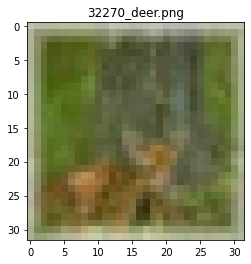

In [22]:
plt.imshow(image)
plt.title(os.path.basename(path))
plt.show()

In [23]:
# tf_data를 사용

In [25]:
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image

In [29]:
# genetator
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)

In [32]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([32, 32, 3])

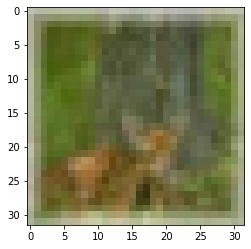

In [34]:
plt.imshow(tf_image)
plt.show()

In [37]:
# genetator
dataset = tf.data.Dataset.from_tensor_slices(data_paths)
dataset = dataset.map(read_image)
dataset = dataset.batch(8)

In [38]:
tf_image = next(iter(dataset))
tf_image.shape

TensorShape([8, 32, 32, 3])

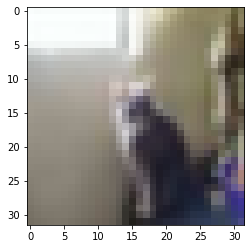

In [41]:
plt.imshow(tf_image[1])
plt.show()

In [43]:
# genetator
dataset = tf.data.Dataset.from_tensor_slices(data_paths) # 데이터 경로를 넣음
dataset = dataset.map(read_image) # 함수를 넣음
dataset = dataset.batch(8)
dataset = dataset.shuffle(buffer_size = len(data_paths))

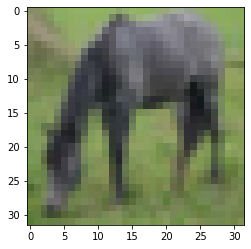

In [45]:
tf_image = next(iter(dataset))

plt.imshow(tf_image[0])

In [46]:
path

'data/cifar/train/32270_deer.png'

In [48]:
class_name = path.split('_')[1].split('.png')[0]

In [49]:
def get_label(path):
    return path.split('_')[1].split('.png')[0]

In [51]:
label_names = [ get_label(path) for path in data_paths]
label_names[:10]

['deer',
 'cat',
 'deer',
 'truck',
 'automobile',
 'bird',
 'horse',
 'frog',
 'ship',
 'ship']

In [53]:
class_names = np.unique(label_names)
class_names

array(['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
       'horse', 'ship', 'truck'], dtype='<U10')

In [56]:
np.array(class_names=='frog')

array([False, False, False, False, False, False,  True, False, False,
       False])

In [73]:
def ohe(label):
    return np.array(class_names==label, np.uint8)

In [74]:
def get_label(path):
    return path.split('_')[1].split('.png')[0]

In [75]:
def read_image(path, alpha):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    return image, alpha

In [79]:
dataset = tf.data.Dataset.from_tensor_slices((data_paths, label_names))
dataset = dataset.map(read_image)
dataset = dataset.batch(32)
# dataset = dataset.shuffle(len(dataset))
dataset = dataset.repeat()

In [80]:
image, label = next(iter(dataset))
image.shape, label.shape

(TensorShape([32, 32, 32, 3]), TensorShape([32]))

In [81]:
label[0]

<tf.Tensor: shape=(), dtype=string, numpy=b'deer'>

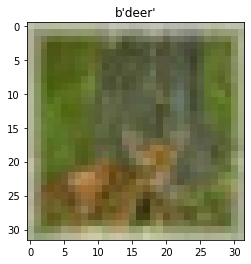

In [82]:
plt.imshow(image[0])
plt.title(np.array(label[0]))
plt.show()

In [93]:
def read_image_label(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    
    label = get_label(path)
    label = np.array(class_names==label, np.uint8)
    return image, label

#### Data Preprocessing

In [102]:
train_paths = glob('data/cifar/train/*.png')
test_paths = glob('data/cifar/test/*.png')

In [106]:
train_paths[:4]

['data/cifar/train/32270_deer.png',
 'data/cifar/train/21851_cat.png',
 'data/cifar/train/48309_deer.png',
 'data/cifar/train/33547_truck.png']

In [107]:
path = train_paths[0]
path

'data/cifar/train/32270_deer.png'

In [133]:
def get_class_name(path):
    fname = tf.strings.split(path,'_')[-1]
    return tf.strings.regex_replace(fname,'.png','')

In [110]:
path, get_class_name(path)

('data/cifar/train/32270_deer.png', 'deer')

In [118]:
class_names= [ get_class_name(path) for path in train_paths]
classes = np.unique(class_names)

In [120]:
classes
classes == get_class_name(path)

array([False, False, False, False,  True, False, False, False, False,
       False])

In [125]:
ohe = tf.castdef get_class_name(path):
    fname = tf.strings.split(path,'_')[-1]
    return tf.strings.regex_replace(fname,'.png','')(classes == get_class_name(path),tf.uint8)
ohe

<tf.Tensor: shape=(10,), dtype=uint8, numpy=array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0], dtype=uint8)>

In [156]:
def get_class_name(path):
    fname = tf.strings.split(path,'_')[-1]
    return tf.strings.regex_replace(fname,'.png','')

In [157]:
def ohe(label):
    classes == get_class_name(label)
    ohe_class = tf.cast(classes == get_class_name(path),tf.uint8)
    return ohe_class

In [158]:
def read_dataset(path):
    #read image
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile)
    image = tf.cast(image,tf.float32) / 255.
    #read label
    class_names = get_class_name(path)
    label = ohe(class_names)
    return image, label

In [159]:
def image_prerprocessing(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    return image, label

In [160]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_paths)
train_dataset = train_dataset.map(read_dataset)
train_dataset = train_dataset.map(image_prerprocessing)
train_dataset = train_dataset.batch(8)
train_dataset = train_dataset.shuffle(buffer_size=len(train_paths))
train_dataset = train_dataset.repeat()

In [161]:
test_dataset = tf.data.Dataset.from_tensor_slices(test_paths)
test_dataset = test_dataset.map(read_dataset)
test_dataset = test_dataset.batch(8)
test_dataset = test_dataset.shuffle(buffer_size=len(test_paths))
test_dataset = test_dataset.repeat()

In [163]:
#training

In [171]:
inputs = layers.Input((28, 28, 1))
net = layers.Conv2D(32, (3, 3), padding='SAME')(inputs)
net = layers.Activation('relu')(net)
net = layers.Conv2D(32, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.Conv2D(64, (3, 3), padding='SAME')(net)
net = layers.Activation('relu')(net)
net = layers.MaxPooling2D(pool_size=(2, 2))(net)
net = layers.Dropout(0.25)(net)

net = layers.Flatten()(net)
net = layers.Dense(512)(net)
net = layers.Activation('relu')(net)
net = layers.Dropout(0.5)(net)
net = layers.Dense(10)(net)  # num_classes
net = layers.Activation('softmax')(net)

model = tf.keras.Model(inputs=inputs, outputs=net, name='Basic_CNN')

In [172]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
                loss = 'sparse_categorical_crossentropy',
                metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

In [173]:
model.fit_generator(train_dataset,
                   steps_per_epoch=len(train_paths)//8,
                   validation_data = test_dataset,
                   validation_steps = len(test_paths)//8,
                   epochs=1
                  )

ValueError: in user code:

    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:806 train_function  *
        return step_function(self, iterator)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:796 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:1211 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2585 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/distribute/distribute_lib.py:2945 _call_for_each_replica
        return fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:789 run_step  **
        outputs = model.train_step(data)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/training.py:759 train_step
        self.compiled_metrics.update_state(y, y_pred, sample_weight)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/engine/compile_utils.py:409 update_state
        metric_obj.update_state(y_t, y_p, sample_weight=mask)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/utils/metrics_utils.py:90 decorated
        update_op = update_state_fn(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:176 update_state_fn
        return ag_update_state(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:612 update_state  **
        matches = ag_fn(y_true, y_pred, **self._fn_kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/keras/metrics.py:3301 sparse_categorical_accuracy
        y_true = array_ops.squeeze(y_true, [-1])
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/dispatch.py:201 wrapper
        return target(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/util/deprecation.py:507 new_func
        return func(*args, **kwargs)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/array_ops.py:4259 squeeze
        return gen_array_ops.squeeze(input, axis, name)
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/ops/gen_array_ops.py:10043 squeeze
        _, _, _op, _outputs = _op_def_library._apply_op_helper(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/op_def_library.py:742 _apply_op_helper
        op = g._create_op_internal(op_type_name, inputs, dtypes=None,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/func_graph.py:591 _create_op_internal
        return super(FuncGraph, self)._create_op_internal(  # pylint: disable=protected-access
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:3477 _create_op_internal
        ret = Operation(
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1974 __init__
        self._c_op = _create_c_op(self._graph, node_def, inputs,
    /opt/anaconda3/lib/python3.8/site-packages/tensorflow/python/framework/ops.py:1815 _create_c_op
        raise ValueError(str(e))

    ValueError: Can not squeeze dim[1], expected a dimension of 1, got 10 for '{{node Squeeze}} = Squeeze[T=DT_FLOAT, squeeze_dims=[-1]](Cast_1)' with input shapes: [?,10].
